# Step 1 — Purpose of the Project

This notebook will guide the complete analysis of the Cobify fuel consumption dataset.  
The goal of this project is to explore, clean, visualize, enrich, and model the data in order to determine which fuel type leads to lower consumption.

We will follow a structured, step-by-step workflow:

1. Load and inspect the raw data  
2. Clean and prepare the dataset  
3. Perform exploratory data analysis  
4. Build visualizations to understand relationships  
5. Create predictive models  
6. Generate insights and recommendations  


# Step 2 — Convert the Excel File to CSV

In [1]:
import pandas as pd

# Read the Excel file from the data folder
df_excel = pd.read_excel("data/measurements2.xlsx")

# Convert to CSV in the same folder
df_excel.to_csv("data/measurements2_converted.csv", index=False)

df_excel.head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


# Step 3 — Load the CSV Files

In [3]:
df1 = pd.read_csv("data/measurements.csv")
df2 = pd.read_csv("data/measurements2_converted.csv")

df1.head(), df2.head()

(  distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
 0       28       5     26        21,5            12      NaN      E10   0   
 1       12     4,2     30        21,5            13      NaN      E10   0   
 2     11,2     5,5     38        21,5            15      NaN      E10   0   
 3     12,9     3,9     36        21,5            14      NaN      E10   0   
 4     18,5     4,5     46        21,5            15      NaN      E10   0   
 
    rain  sun refill liters refill gas  
 0     0    0            45        E10  
 1     0    0           NaN        NaN  
 2     0    0           NaN        NaN  
 3     0    0           NaN        NaN  
 4     0    0           NaN        NaN  ,
    distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
 0      28.0      5.0     26         21.5            12      NaN      E10   0   
 1      12.0      4.2     30         21.5            13      NaN      E10   0   
 2      11.2      5.5     38         21.

# Step 4 — Inspect Columns and Fix Decimal Formats

In [5]:
# Show dtypes to see which columns are still objects
df1.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

# Step 5 — Clean Numeric Columns

In [6]:
cols_to_clean = ["distance", "consume", "temp_inside", "refill liters"]

for col in cols_to_clean:
    df1[col] = df1[col].astype(str).str.replace(",", ".", regex=False)
    df1[col] = pd.to_numeric(df1[col], errors="coerce")

df1.dtypes


distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

# Step 6 — Compare Both Datasets

In [7]:
df1.shape, df2.shape, df1.columns, df2.columns

((388, 12),
 (388, 12),
 Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
        'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
        'refill gas'],
       dtype='object'),
 Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
        'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
        'refill gas'],
       dtype='object'))

# Step 7 — Select the Main Dataset

Both datasets contain the exact same structure and number of rows.  
To avoid duplication, we keep only the cleaned version (`df1`) and rename it to `df` for simplicity.


In [8]:
df = df1.copy()
df.head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


# Step 8 — Dataset Overview (Shape, Missing Values, Summary Statistics)

Before creating visualizations, we need a quick structural overview of the dataset.
This helps identify:
- the scale of each variable  
- potential missing data issues  
- distributions and ranges  

In [9]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())
print("\nSummary statistics:\n", df.describe())
print("\nUnique values per column:\n", df.nunique())


Shape: (388, 12)

Missing values:
 distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

Summary statistics:
          distance     consume       speed  temp_inside  temp_outside  \
count  388.000000  388.000000  388.000000   376.000000    388.000000   
mean    19.652835    4.912371   41.927835    21.929521     11.358247   
std     22.667837    1.033172   13.598524     1.010455      6.991542   
min      1.300000    3.300000   14.000000    19.000000     -5.000000   
25%     11.800000    4.300000   32.750000    21.500000      7.000000   
50%     14.600000    4.700000   40.500000    22.000000     10.000000   
75%     19.000000    5.300000   50.000000    22.500000     16.000000   
max    216.100000   12.200000   90.000000    25.500000     31.000000   

               AC        rain

# Step 9 — Clean the Dataset

In [10]:
# Drop useless columns
df = df.drop(columns=["specials", "refill liters", "refill gas"])

# Fill temp_inside missing values
df["temp_inside"] = df["temp_inside"].fillna(df["temp_inside"].median())

df.isna().sum()


distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

# Step 10 — Visual EDA: Distributions

We start by inspecting the distributions of:
- distance  
- consume  
- speed  
- temp_inside  
- temp_outside  

This helps us understand skewness, typical ranges, and potential outliers.


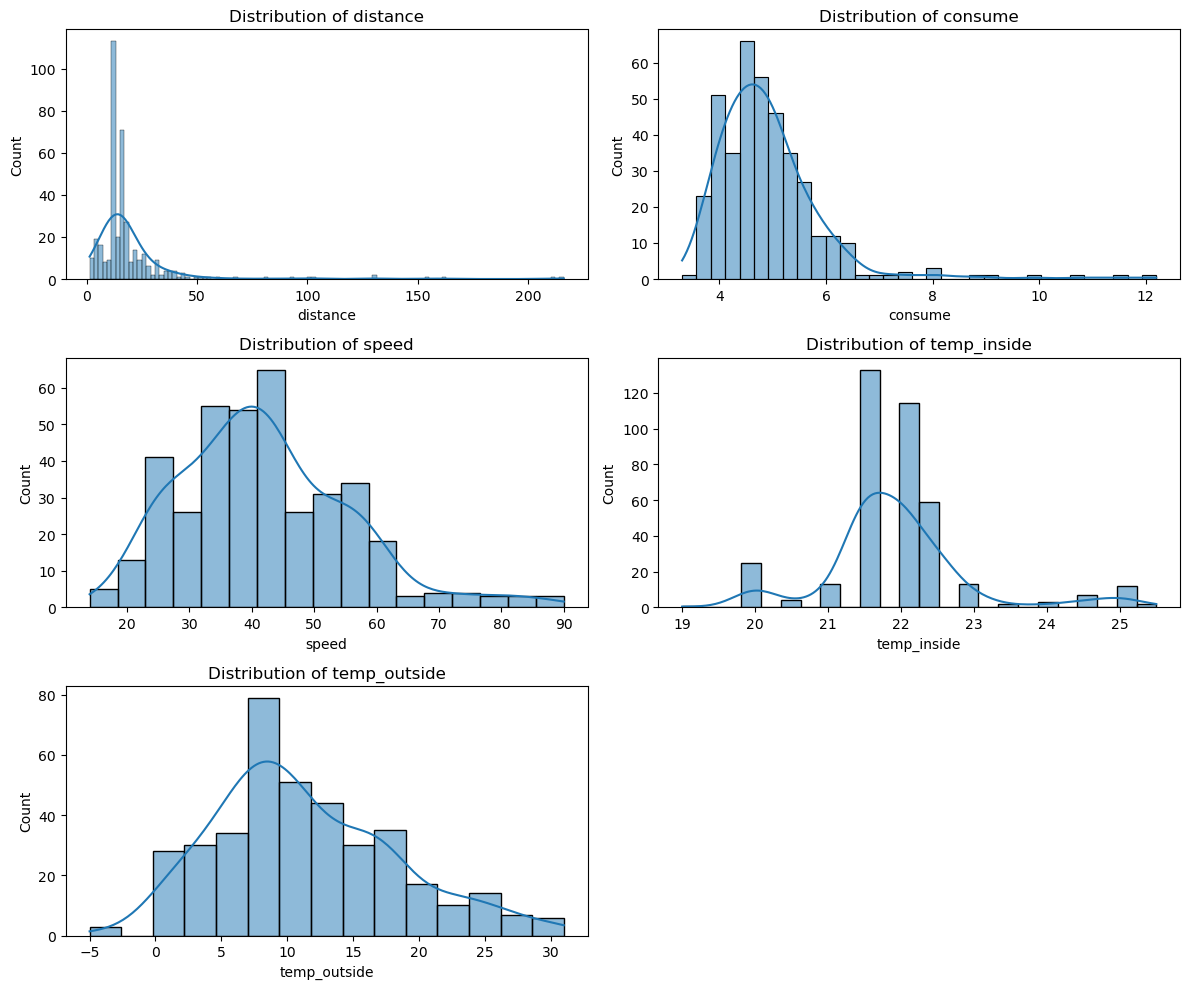

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["distance", "consume", "speed", "temp_inside", "temp_outside"]

plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


# Step 11 — Relationship Between Consume and Other Variables

We analyze how fuel consumption relates to:
- distance
- speed
- temp_inside
- temp_outside
- gas_type
- AC, rain, sun

We use scatterplots for numeric variables and boxplots for categorical variables.


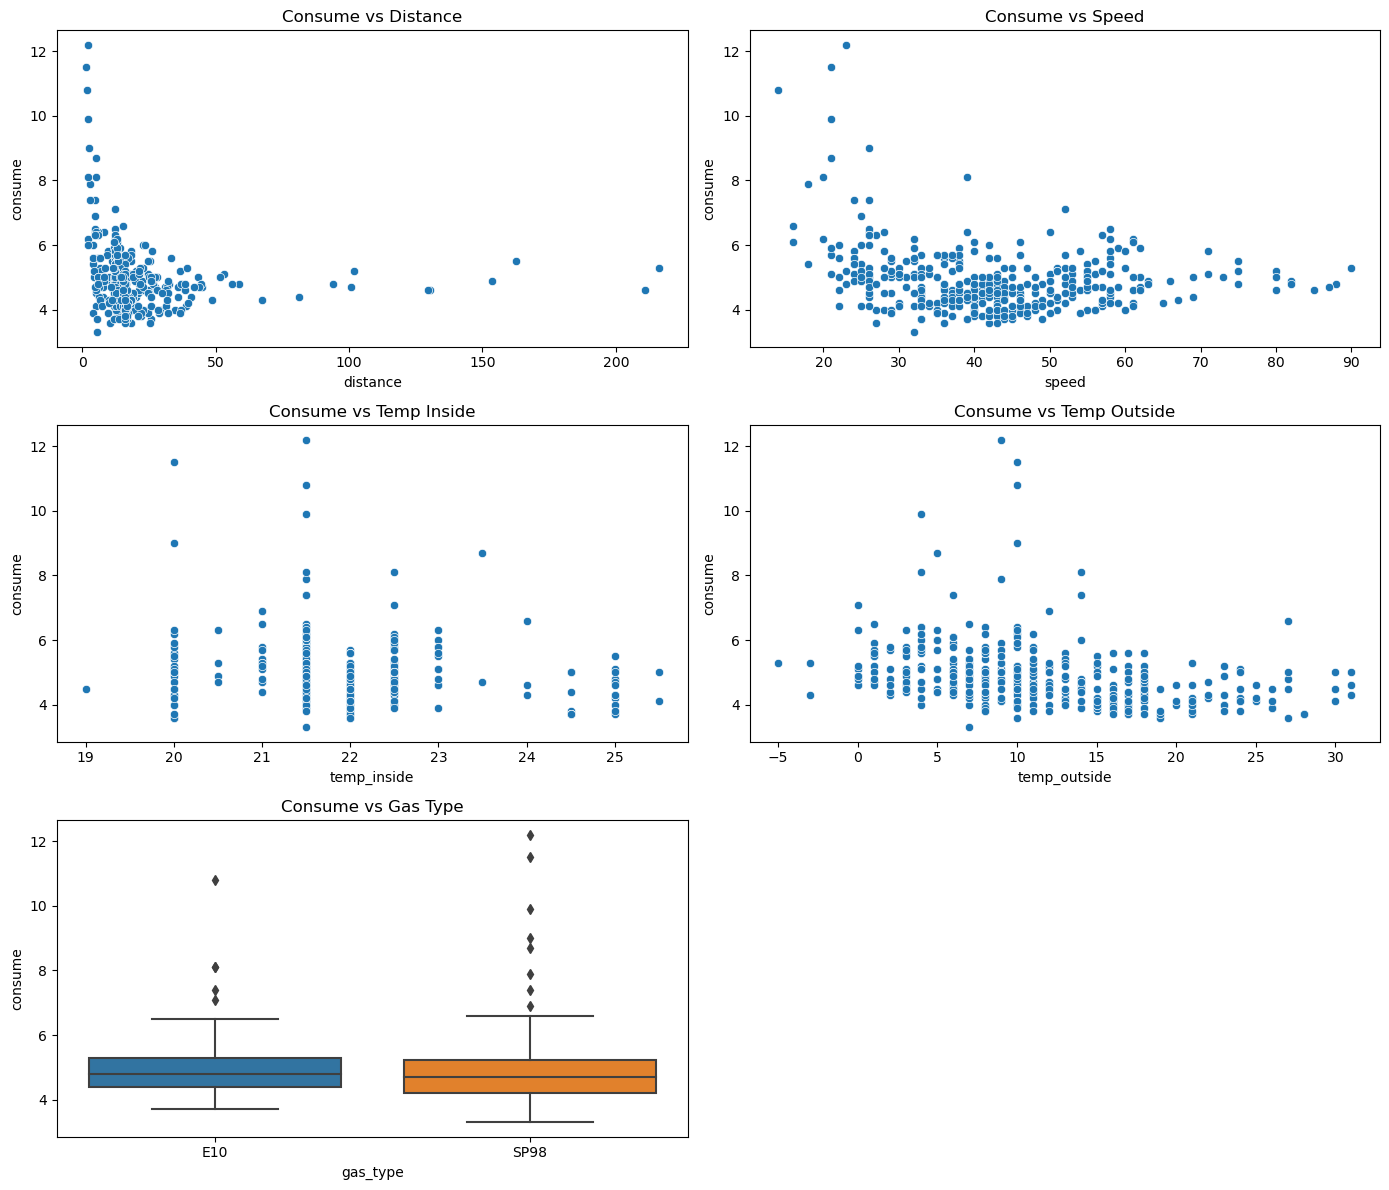

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))

# scatter consume vs distance
plt.subplot(3, 2, 1)
sns.scatterplot(x=df["distance"], y=df["consume"])
plt.title("Consume vs Distance")

# scatter consume vs speed
plt.subplot(3, 2, 2)
sns.scatterplot(x=df["speed"], y=df["consume"])
plt.title("Consume vs Speed")

# scatter consume vs temp_inside
plt.subplot(3, 2, 3)
sns.scatterplot(x=df["temp_inside"], y=df["consume"])
plt.title("Consume vs Temp Inside")

# scatter consume vs temp_outside
plt.subplot(3, 2, 4)
sns.scatterplot(x=df["temp_outside"], y=df["consume"])
plt.title("Consume vs Temp Outside")

# boxplot consume vs gas_type
plt.subplot(3, 2, 5)
sns.boxplot(x=df["gas_type"], y=df["consume"])
plt.title("Consume vs Gas Type")

plt.tight_layout()
plt.show()


# Step 12 — Correlation Heatmap & Statistical Test (Gas Type)

We compute the correlation matrix for numeric variables and perform
a statistical test (t-test) to check whether the difference between
E10 and SP98 consumption is significant.
python
Copy code


C:\Users\Irma\AppData\Local\Temp\ipykernel_21472\2039913923.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


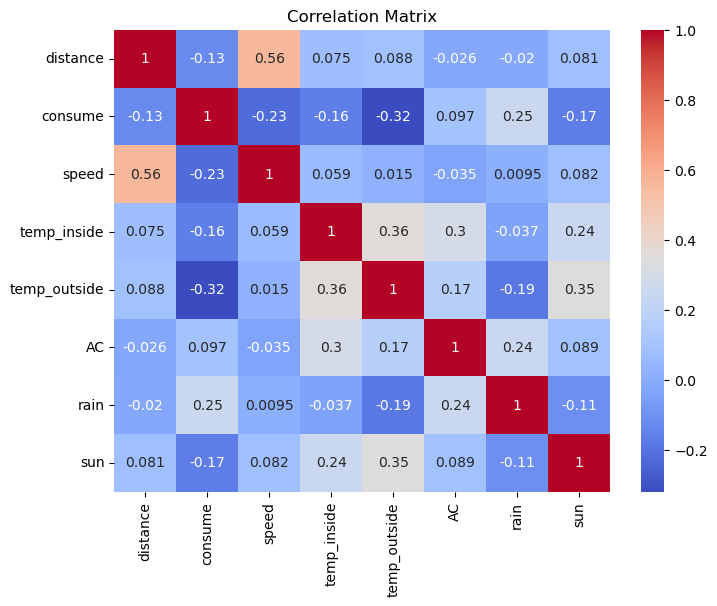

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [14]:
from scipy.stats import ttest_ind

e10 = df[df["gas_type"] == "E10"]["consume"]
sp98 = df[df["gas_type"] == "SP98"]["consume"]

stat, p = ttest_ind(e10, sp98)

p


0.7634526478628367

✅ Conclusion:

“The difference in fuel consumption between E10 and SP98 is NOT statistically significant.”


# Step 13 — Simple Linear Regression Model

We create a regression model to predict fuel consumption (`consume`)
based on the available numeric and categorical features.

This helps us identify:
- which variables impact consumption
- whether gas_type contributes to prediction


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# -----------------------
# 1. Define features and target
# -----------------------
X = df.drop(columns=["consume"])
y = df["consume"]

# -----------------------
# 2. Identify categorical and numeric columns
# -----------------------
cat_cols = ["gas_type"]
num_cols = [col for col in X.columns if col not in cat_cols]

# -----------------------
# 3. Preprocessing: one-hot encode gas_type
# -----------------------
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# -----------------------
# 4. Build pipeline
# -----------------------
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", LinearRegression())
])

# -----------------------
# 5. Train-test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------
# 6. Fit model
# -----------------------
model.fit(X_train, y_train)

# -----------------------
# 7. Evaluate model
# -----------------------
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(0.6598027559858751, 0.09412310938686363)

# Step 14 — Feature Importance (Random Forest)

Linear Regression showed limited predictive power.
To better understand variable influence, we use a Random Forest Regressor,
which captures nonlinear relationships and provides feature importance values.


In [17]:
from sklearn.ensemble import RandomForestRegressor

# -----------------------
# 1. Rebuild X with encoded categories
# -----------------------
df_encoded = pd.get_dummies(df, columns=["gas_type"], drop_first=True)

X = df_encoded.drop(columns=["consume"])
y = df_encoded["consume"]

# -----------------------
# 2. Train-test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------
# 3. Train model
# -----------------------
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# -----------------------
# 4. Feature importance
# -----------------------
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)


distance         0.659489
speed            0.130940
temp_outside     0.123540
temp_inside      0.035744
rain             0.027751
gas_type_SP98    0.010390
AC               0.009388
sun              0.002758
dtype: float64

# Step 15 — Final Storytelling & Recommendations

## 🔍 Summary of Findings

### 1. Fuel type (E10 vs SP98)
- Visual differences were small
- Statistical test (p = 0.76) shows **no significant difference**
- Feature importance confirms gas_type has **almost no effect** (score = 0.01)

**Conclusion:**  
➡️ SP98 does NOT reduce consumption compared to E10  
➡️ Cobify can safely choose the cheaper fuel

---

### 2. What actually influences consumption?
According to the Random Forest model:

1. **Distance** → short trips dramatically increase consumption  
2. **Speed** → traffic / low-speed driving raises consumption  
3. **Outside temperature** → colder days increase consumption  
4. Light effects from rain  
5. AC, Sun, Inside temp → minimal influence

---

## 📈 Practical Recommendations for Cobify

1. **Use E10 instead of SP98**
   - Same consumption  
   - Cheaper price  
   - Same performance in data  

2. **Reduce short inefficient trips**
   - Batch nearby rides  
   - Encourage longer trip matching  
   - Optimize route assignment

3. **Improve operations in cold conditions**
   - Cars consume more on cold days  
   - Pre-warm engines  
   - Plan routes to avoid excessive idling

---

## 🧠 Conclusion
Fuel type does NOT determine fuel efficiency.  
Driving conditions do.

Cobify should choose the **cheapest fuel option** (E10),  
and focus on optimizing trips, distances, and speeds to reduce consumption.


# Step 16 — Save the Final Processed Dataset


In [18]:
df.to_csv("data/processed_measurements.csv", index=False)
